In [ ]:
## The point of the project is to analyze NBA stats based on age group to help NBA teams figure out 
# What players to scout

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
#Importing the data
nba_stats = pd.read_csv('2022_2023_Regular.csv',encoding='ISO-8859-1', sep=';')

In [3]:
#We can see here players repeat if they were traded during the season
nba_stats.head(20)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,...,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
6,6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,...,0.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,...,0.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
8,7,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,...,0.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
9,8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,...,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3


In [4]:
#We can use this code to determine what players occur more than once .value_counts is able to count how 
#many times a unique value appears, in this case 'players' > 1 
player_counts = nba_stats['Player'].value_counts()
repeated_players = player_counts[player_counts > 1]
repeated_players

Player
Dorian Finney-Smith    3
Thomas Bryant          3
Spencer Dinwiddie      3
Moses Brown            3
Eugene Omoruyi         3
                      ..
Malik Beasley          3
Bruno Fernando         3
Will Barton            3
Garrison Mathews       3
Frank Kaminsky         3
Name: count, Length: 70, dtype: int64

In [5]:
#This code allows me to drop players that occur more than once but keep their average stats which is labeled
#'TOT' in the data set. Have to switch it to a list in order to use .isin, makes it easier for me to understand
#Have to reset the index or its all messed up
repeated_players = player_counts[player_counts > 1].index.tolist()
drop_repeated = nba_stats[(nba_stats['Player'].isin(repeated_players)) & (nba_stats['Tm'] != 'TOT')].index
nba_stats.drop(drop_repeated, inplace=True)
nba_stats.reset_index(drop=True, inplace=True)
nba_stats.head(20)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,...,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
6,7,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,...,0.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
7,8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,...,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3
8,9,Jose Alvarado,PG,24,NOP,61,10,21.5,3.3,8.0,...,0.813,0.5,1.9,2.3,3.0,1.1,0.2,1.3,2.0,9.0
9,10,Kyle Anderson,PF,29,MIN,69,46,28.4,3.7,7.2,...,0.735,1.0,4.4,5.3,4.9,1.1,0.9,1.5,2.1,9.4


In [6]:
#Double check to see if it worked
updated_player_counts = nba_stats['Player'].value_counts()
still_repeated_players = updated_player_counts[updated_player_counts > 1]
still_repeated_players

Series([], Name: count, dtype: int64)

In [7]:
#Check missing values
missing_values = nba_stats.isnull().sum()
missing_values

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [8]:
#Check to see if the data types are fine
data_types = nba_stats.dtypes
data_types

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [9]:
#When looking at the data there were a few players that switched postions, decided to change it so that their
#Postion is based on the team they were traded to.
pos_change = {
    'PF-SF': 'SF',
    'SF-SG': 'SG',
    'SG-PG': 'PG'
}
nba_stats['Pos'] = nba_stats['Pos'].replace(pos_change)

count    539.000000
mean      48.042672
std       24.648006
min        1.000000
25%       30.500000
50%       54.000000
75%       68.000000
max       83.000000
Name: G, dtype: float64


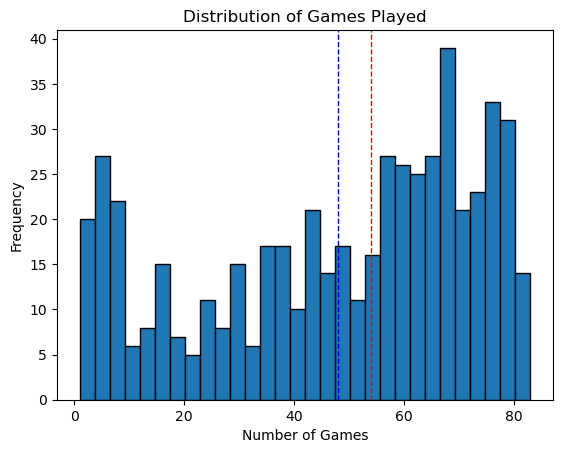

In [10]:
#Make histogram to find distribution 
games_played = nba_stats['G']


print(games_played.describe())


plt.hist(games_played, bins=30, edgecolor = 'black')
plt.title('Distribution of Games Played')
plt.xlabel('Number of Games')
plt.ylabel('Frequency')
plt.axvline(games_played.median(), color='red', linestyle='dashed', linewidth=1)  # Median line
plt.axvline(games_played.mean(), color='blue', linestyle='dashed', linewidth=1)   # Mean line
plt.show()


In [11]:
print(games_played.median())

54.0


In [12]:
#Chose 54 to since the data is negatively skewed, used the median as the cutoff point
nba_stats = nba_stats[nba_stats['G'] >= 54] 


In [13]:
#Use IQR to find outliers 
columns_to_check = ['PTS', 'AST', 'TRB', '3P', 'BLK', 'STL']
outliers = {}

for column in columns_to_check:
    Q1 = nba_stats[column].quantile(0.25)
    Q3 = nba_stats[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_in_column = nba_stats[(nba_stats[column] < lower_bound) | (nba_stats[column] > upper_bound)]
    outliers[column] = outliers_in_column

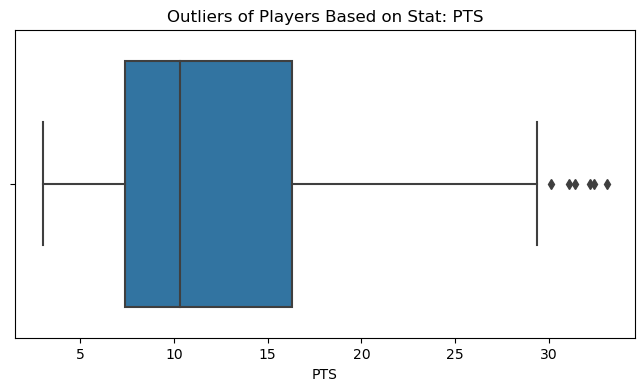

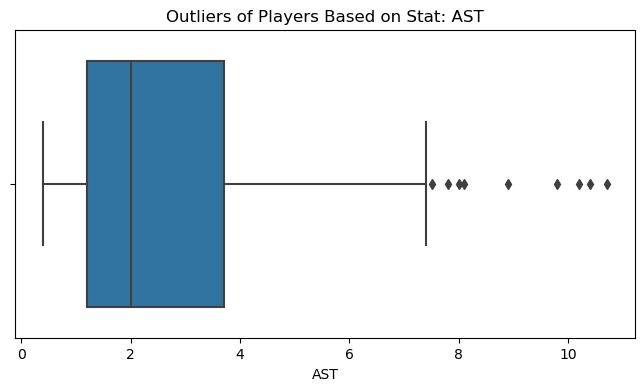

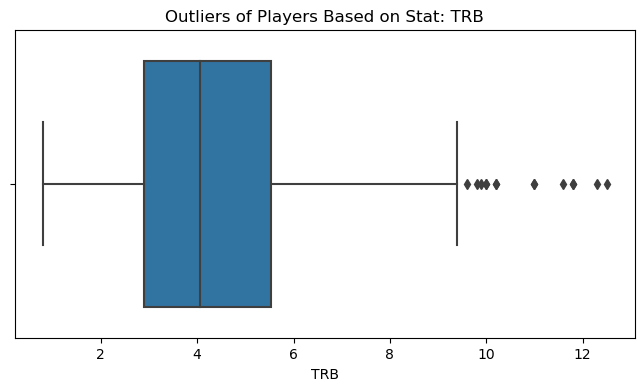

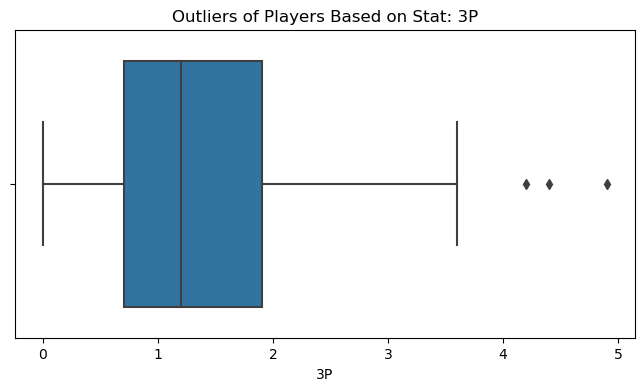

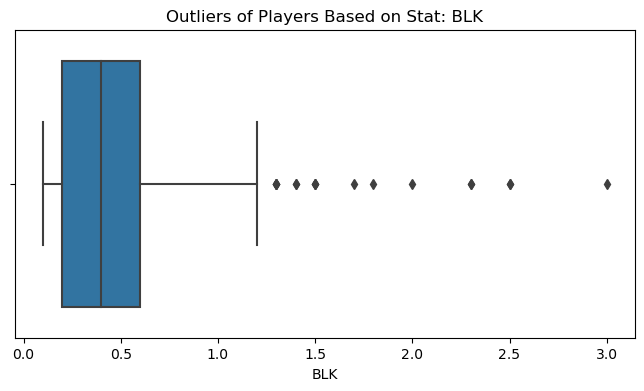

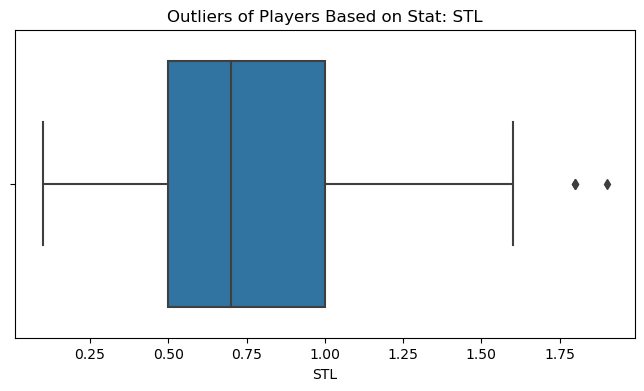

In [14]:
#For loop in order to do this based on various stats 
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=nba_stats[column])
    plt.title(f'Outliers of Players Based on Stat: {column}')
    plt.show()

In [15]:
#Function to add column for various age groups
def age_group(age):
    if age < 25:
        return 'Under 25'
    elif 25 <= age <= 30:
        return '25-30'
    else:
        return 'Over 30'

nba_stats['Age Group'] = nba_stats['Age'].apply(age_group)

In [16]:
nba_stats.dtypes

Rk             int64
Player        object
Pos           object
Age            int64
Tm            object
G              int64
GS             int64
MP           float64
FG           float64
FGA          float64
FG%          float64
3P           float64
3PA          float64
3P%          float64
2P           float64
2PA          float64
2P%          float64
eFG%         float64
FT           float64
FTA          float64
FT%          float64
ORB          float64
DRB          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
TOV          float64
PF           float64
PTS          float64
Age Group     object
dtype: object

In [17]:
#Get the average stats 
age_group_stats = nba_stats.groupby('Age Group')[['PTS', 'AST', 'TRB', '3P','BLK', 'STL']].mean()
age_group_stats

,PTS,AST,TRB,3P,BLK,STL
Age Group,,,,,,
25-30,12.606087,2.652174,4.823478,1.321739,0.498261,0.766957
Over 30,12.993023,3.539535,4.432558,1.648837,0.423256,0.744186
Under 25,12.099153,2.501695,4.359322,1.231356,0.502542,0.768644


In [18]:
age_group_stats.round(2)

,PTS,AST,TRB,3P,BLK,STL
Age Group,,,,,,
25-30,12.61,2.65,4.82,1.32,0.50,0.77
Over 30,12.99,3.54,4.43,1.65,0.42,0.74
Under 25,12.10,2.50,4.36,1.23,0.50,0.77


In [19]:
#Reset the index since we are melting the stats, melt them to change their postioning
melted_stats = age_group_stats.reset_index().melt(id_vars='Age Group', var_name='Statistic', value_name='Value')
melted_stats

,Age Group,Statistic,Value
0,25-30,PTS,12.606087
1,Over 30,PTS,12.993023
2,Under 25,PTS,12.099153
3,25-30,AST,2.652174
4,Over 30,AST,3.539535
5,Under 25,AST,2.501695
6,25-30,TRB,4.823478
7,Over 30,TRB,4.432558
8,Under 25,TRB,4.359322
9,25-30,3P,1.321739


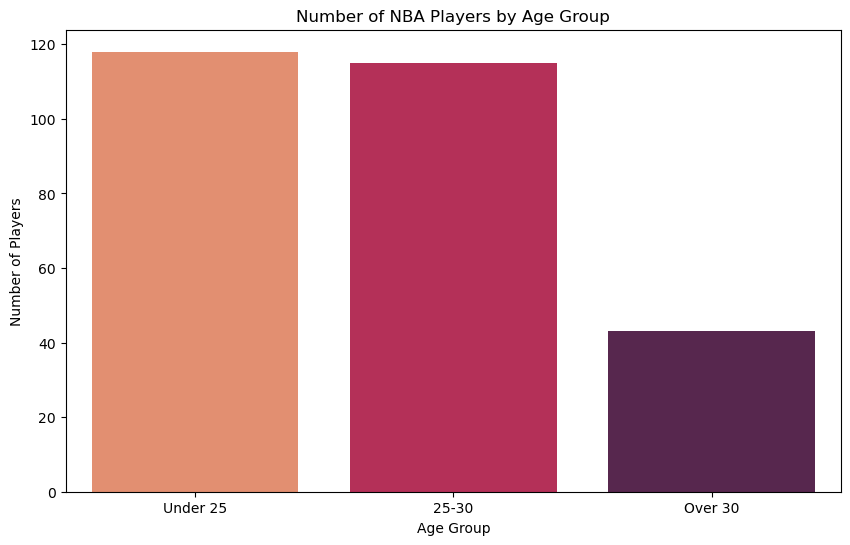

In [20]:
#Make a graph of total players after cleaning up all the data 
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=nba_stats,palette= "rocket_r")
plt.title('Number of NBA Players by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.show()

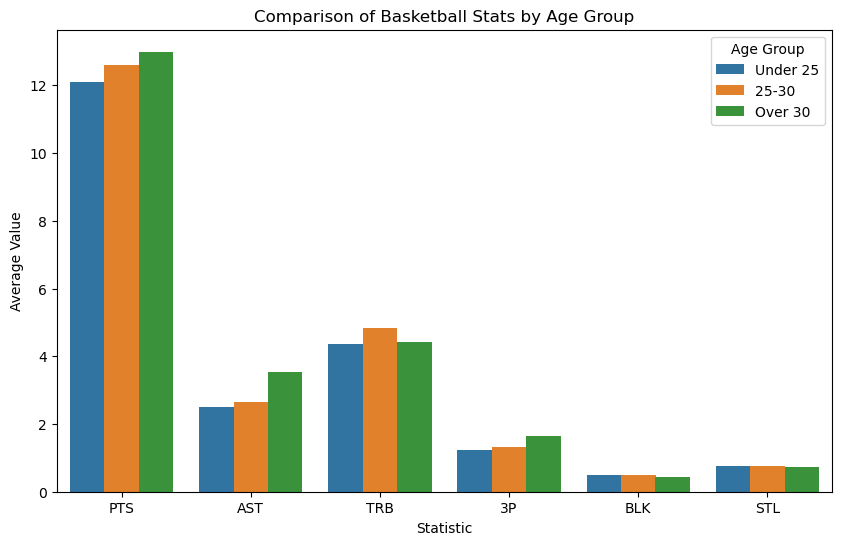

In [21]:
#Make the histogram for the stats, MAKE SURE the data is melted 
plt.figure(figsize=(10, 6))
sns.barplot(x='Statistic', y='Value', hue='Age Group', data=melted_stats, 
            hue_order=['Under 25', '25-30', 'Over 30'], )

plt.title('Comparison of Basketball Stats by Age Group')
plt.xlabel('Statistic')
plt.ylabel('Average Value')
plt.legend(title='Age Group')
plt.show()

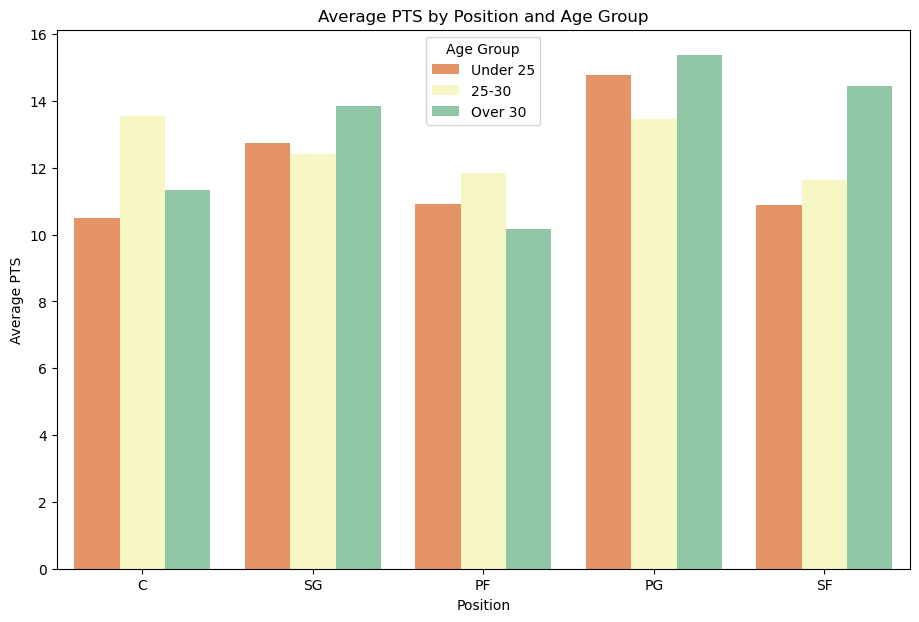

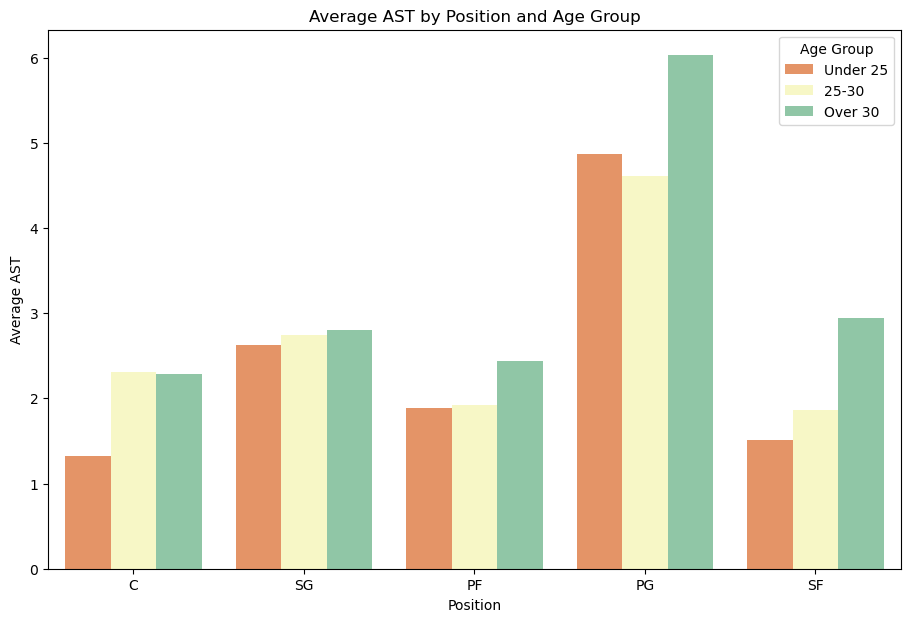

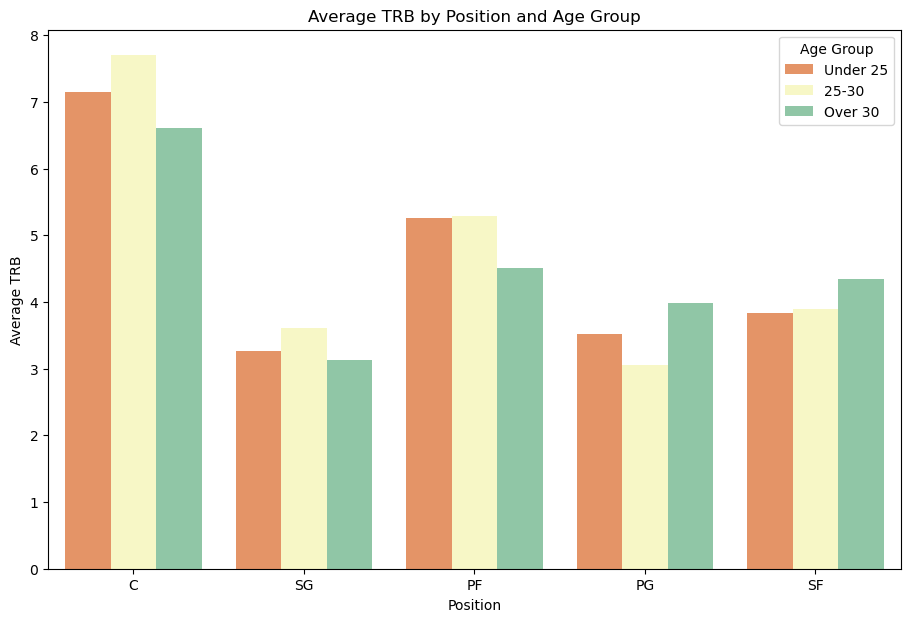

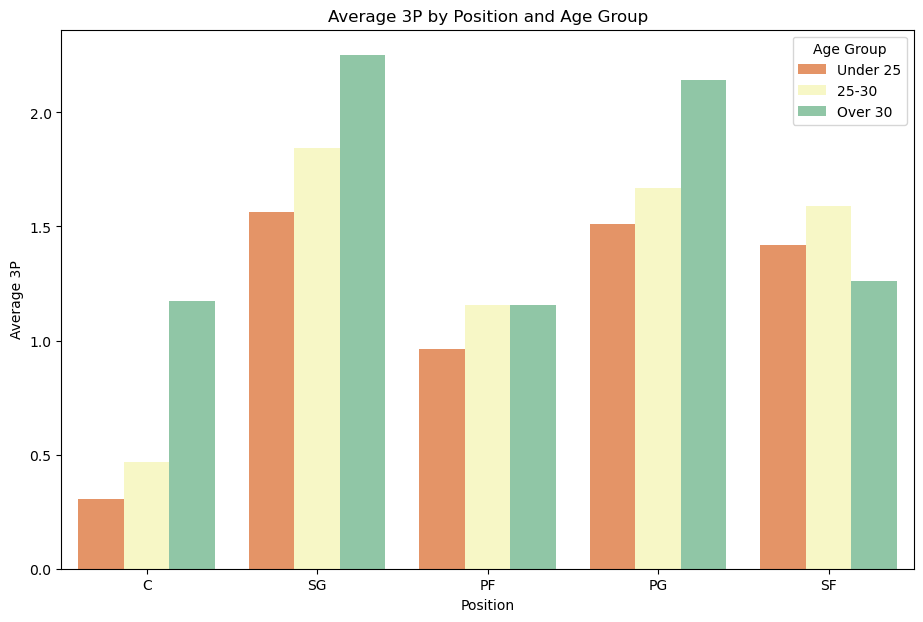

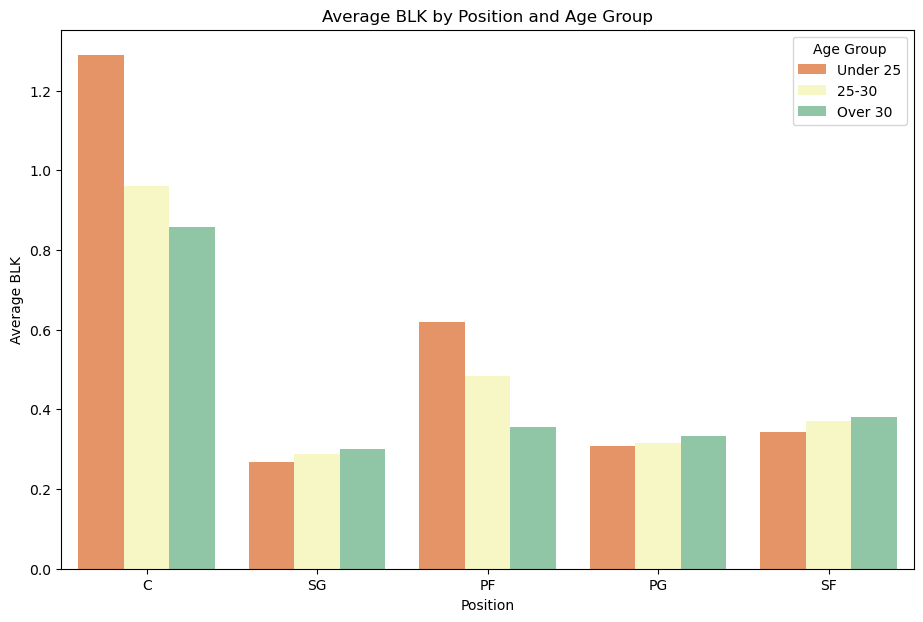

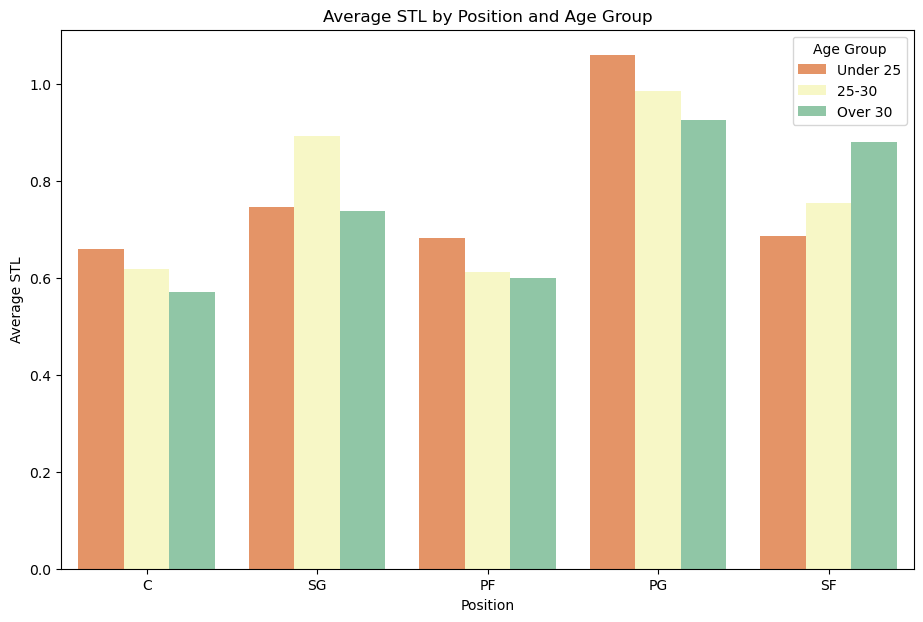

In [22]:
#Realized here that seaborn automatically takes the average when you call the sns.barplot, did not really need to
#melt the stats, got desired output
stats_to_analyze = ['PTS', 'AST', 'TRB', '3P', 'BLK', 'STL']

for stat in stats_to_analyze:
    plt.figure(figsize=(11, 7))
    sns.barplot(x='Pos', y=stat, hue='Age Group', data=nba_stats, errorbar = None, palette = "Spectral")
    plt.title(f'Average {stat} by Position and Age Group')
    plt.xlabel('Position')
    plt.ylabel(f'Average {stat}')
    plt.legend(title='Age Group')
    plt.show()




In [23]:
#Counting total players analyzed 
nba_stats.count()

Rk           276
Player       276
Pos          276
Age          276
Tm           276
G            276
GS           276
MP           276
FG           276
FGA          276
FG%          276
3P           276
3PA          276
3P%          276
2P           276
2PA          276
2P%          276
eFG%         276
FT           276
FTA          276
FT%          276
ORB          276
DRB          276
TRB          276
AST          276
STL          276
BLK          276
TOV          276
PF           276
PTS          276
Age Group    276
dtype: int64